### virtal environment
ctrl+shift+p ==>python create venv ==>Venv or conda then select version of python ==>select kernel python 3.12//

conda create -p venv python==3.12 -y  // for terminal conda environment//

to activate ==>conda activate venv/

In [3]:
# pip install --upgrade pip
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install xgboost
# pip install catboost
#! pip install scikit-learn==1.5.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# modeling
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.model_selection import GridSearchCV

In [6]:
# Modelling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

### READING DATASET

In [2]:
df1=pd.read_csv("1990 -1999.csv") 
df1#.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [3]:
df2 =pd.read_csv("2000 -Feb2012.csv")
df2#.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [4]:
df3 =pd.read_csv("Mar2012-Dec2014.csv")
df3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [5]:
df4 =pd.read_csv("Jan2015 -Dec2016.csv")
#df4.head()
df4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [6]:
df5 =pd.read_csv("Jan2017onwards.csv")
df5#.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,62 years 04 months,500000.0
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,61 years,698000.0
183118,2024-07,YISHUN,5 ROOM,508B,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,92 years 11 months,690000.0
183119,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,93 years 06 months,650000.0


In [7]:
df=df1._append(df2)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


### appending dataset

In [8]:
df=df._append(df3)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [9]:
df =df._append(df4)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,488000.0,82.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,455000.0,69.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,778000.0,74.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,575000.0,70.0


In [10]:
df =df._append(df5)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years
183118,2024-07,YISHUN,5 ROOM,508B,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months
183119,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months


In [11]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [16]:
#df.to_csv(r'D:\Backup 11-06-2024\GUVI_PROJECTS\capstone_3\finaldata.csv')

### finaldata merged

In [26]:
data =pd.read_csv("finaldata.csv")
data#.head(

C:\Users\Admin\AppData\Local\Temp\ipykernel_4516\3909547582.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("finaldata.csv")


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
929319,183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months
929320,183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years
929321,183118,2024-07,YISHUN,5 ROOM,508B,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months
929322,183119,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months


In [27]:
data.drop('Unnamed: 0',axis=1,inplace= True)

In [28]:
data.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


### DATA PREPROCESSING
1.EDA - Exploratory Data Analysis|
2.Feature Engineering|
3.Feature Selection|
4. feature Scaling

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929324 entries, 0 to 929323
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929324 non-null  object 
 1   town                 929324 non-null  object 
 2   flat_type            929324 non-null  object 
 3   block                929324 non-null  object 
 4   street_name          929324 non-null  object 
 5   storey_range         929324 non-null  object 
 6   floor_area_sqm       929324 non-null  float64
 7   flat_model           929324 non-null  object 
 8   lease_commence_date  929324 non-null  int64  
 9   resale_price         929324 non-null  float64
 10  remaining_lease      220274 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.0+ MB


In [7]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

### REMOVING DUPLICATES

In [8]:
data.duplicated().sum()

1899

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

### SPLITING COLS AND CHANGING TO INTEGER

1.splitting month col

In [11]:
data["year"] = data["month"].str.split('-').str[0]
data["Month"] = data["month"].str.split('-').str[1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\1214551557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"] = data["month"].str.split('-').str[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\1214551557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["month"].str.split('-').str[1]


2 columns droped unnecessary data not required

In [12]:
data.drop('block',axis = 1,inplace=True)
data.drop('month',axis = 1,inplace=True)
data.drop('remaining_lease',axis = 1,inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\1601340552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('block',axis = 1,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\1601340552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('month',axis = 1,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\1601340552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('remaining_

In [13]:
data["year"] = data["year"].astype('int')
data["Month"] = data["Month"].astype('int')


C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\762559093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"] = data["year"].astype('int')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\762559093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].astype('int')


2. splitting storey_range col

In [14]:
data["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [15]:
data["storey_range_start"] = data["storey_range"].str.split('TO').str[0]
data["storey_range_end"] = data["storey_range"].str.split('TO').str[1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\2799889581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["storey_range_start"] = data["storey_range"].str.split('TO').str[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\2799889581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["storey_range_end"] = data["storey_range"].str.split('TO').str[1]


In [16]:
data.drop('storey_range',axis = 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\2956206679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('storey_range',axis = 1,inplace=True)


In [17]:
data["storey_range_start"] = data["storey_range_start"].astype('int')
data["storey_range_end"] = data["storey_range_end"].astype('int')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\3741523389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["storey_range_start"] = data["storey_range_start"].astype('int')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\3741523389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["storey_range_end"] = data["storey_range_end"].astype('int')


### Introducing Lable encoder to categorical variable

1. Town col

In [18]:
data["town"].unique()   #27

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [29]:
#from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data["town"])

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

with open('label_encoder.pkl', 'rb') as file:
    loaded_label_encoder = pickle.load(file)

data["town"] =loaded_label_encoder.transform(data["town"])   
data["town"] = data["town"].astype('int') 

2. Flat_type col

In [20]:
data["flat_type"].unique()   #8

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [21]:
data["flat_type"]=data["flat_type"].str.replace("-"," ")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6644\2819299886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["flat_type"]=data["flat_type"].str.replace("-"," ")


In [22]:
data["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [32]:
Label_Encoder2 = preprocessing.LabelEncoder()
Label_Encoder2.fit(data["flat_type"])

with open('Label_Encoder2.pkl', 'wb') as file:
    pickle.dump(Label_Encoder2, file)

with open('Label_Encoder2.pkl', 'rb') as file:
    loaded_Label_Encoder2 = pickle.load(file)   

data["flat_type"] =loaded_Label_Encoder2.transform(data["flat_type"])  
data["flat_type"] = data["flat_type"].astype('int')   

In [24]:
data["flat_type"].unique()

array([0, 2, 3, 4, 1, 5, 6])

3. street names col

In [25]:
data["street_name"].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [33]:
Label_Encoder3 = preprocessing.LabelEncoder()
Label_Encoder3.fit(data["street_name"])

with open('Label_Encoder3.pkl', 'wb') as file:
    pickle.dump(Label_Encoder3, file)

with open('Label_Encoder3.pkl', 'rb') as file:
    loaded_Label_Encoder3 = pickle.load(file)

data["street_name"] =loaded_Label_Encoder3.transform(data["street_name"])  
data["street_name"] = data["street_name"].astype('int')  

In [27]:
data["street_name"].unique()

array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

4.flat_model col

In [28]:
data["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [34]:
Label_Encoder4 = preprocessing.LabelEncoder()
Label_Encoder4.fit(data["flat_model"])
with open('Label_Encoder4.pkl', 'wb') as file:
    pickle.dump(Label_Encoder4, file)

with open('Label_Encoder4.pkl', 'rb') as file:
    loaded_Label_Encoder4 = pickle.load(file)

data["flat_model"] =loaded_Label_Encoder4.transform(data["flat_model"])
data["flat_model"] = data["flat_model"].astype('int')

In [30]:
data.head()

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Month,storey_range_start,storey_range_end
0,0,0,13,31.0,7,1977,9000.0,1990,1,10,12
1,0,0,13,31.0,7,1977,6000.0,1990,1,4,6
2,0,0,13,31.0,7,1977,8000.0,1990,1,10,12
3,0,0,13,31.0,7,1977,6000.0,1990,1,7,9
4,0,2,13,73.0,20,1976,47200.0,1990,1,4,6


In [31]:
data.shape

(927425, 11)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927425 entries, 0 to 929323
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927425 non-null  int32  
 1   flat_type            927425 non-null  int32  
 2   street_name          927425 non-null  int32  
 3   floor_area_sqm       927425 non-null  float64
 4   flat_model           927425 non-null  int32  
 5   lease_commence_date  927425 non-null  int64  
 6   resale_price         927425 non-null  float64
 7   year                 927425 non-null  int32  
 8   Month                927425 non-null  int32  
 9   storey_range_start   927425 non-null  int32  
 10  storey_range_end     927425 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 56.6 MB


In [33]:
data.isna().sum()

town                   0
flat_type              0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
Month                  0
storey_range_start     0
storey_range_end       0
dtype: int64

In [34]:
data.to_csv(r'D:\Backup 11-06-2024\GUVI_PROJECTS\capstone_3\encodeddata.csv',index= False)

In [2]:
data1 =pd.read_csv('encodeddata.csv')
data1

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Month,storey_range_start,storey_range_end
0,0,0,13,31.0,7,1977,9000.0,1990,1,10,12
1,0,0,13,31.0,7,1977,6000.0,1990,1,4,6
2,0,0,13,31.0,7,1977,8000.0,1990,1,10,12
3,0,0,13,31.0,7,1977,6000.0,1990,1,7,9
4,0,2,13,73.0,20,1976,47200.0,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...
927420,26,3,573,84.0,28,1987,500000.0,2024,7,7,9
927421,26,4,554,132.0,9,1986,698000.0,2024,7,7,9
927422,26,4,556,113.0,9,2018,690000.0,2024,7,4,6
927423,26,4,556,112.0,9,2018,650000.0,2024,7,1,3


checking min & max & unique Of numeric cols

In [8]:
#data1['year'].unique()
data1['year'].min()
#data1['year'].max()

1990

In [30]:

data1['lease_commence_date'].min()

1966

In [31]:
data1['lease_commence_date'].max()

2020

In [28]:
data1['storey_range_end'].min()
data1['storey_range_end'].max()

3

In [25]:
# data1['storey_range_start'].unique()

#data1['year'].max()
data1['storey_range_start'].max()

49

In [4]:
data1['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

### Data Visualization

In [6]:
data.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


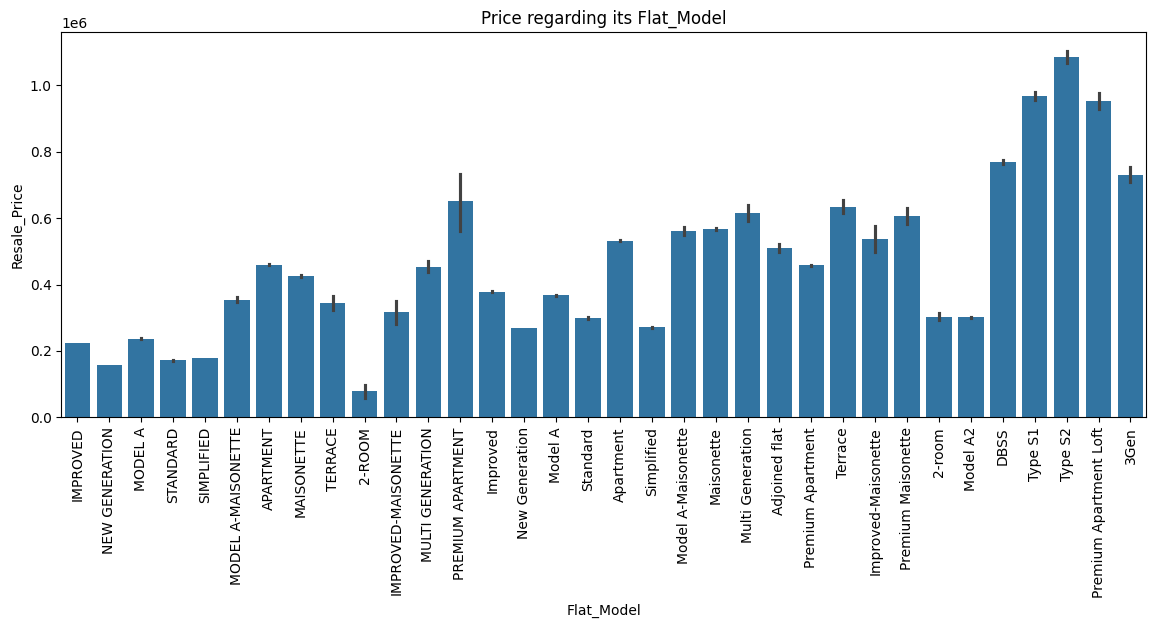

In [30]:
plt.figure(figsize =(14,5))
sns.barplot(data,x='flat_model',y = 'resale_price')
plt.title("Price regarding its Flat_Model"),
plt.xlabel('Flat_Model',font=dict(size=10)),
plt.ylabel('Resale_Price',font=dict(size=10)),   
plt.xticks(rotation=90)
# plt.ylim(5000,1000000)
plt.show()

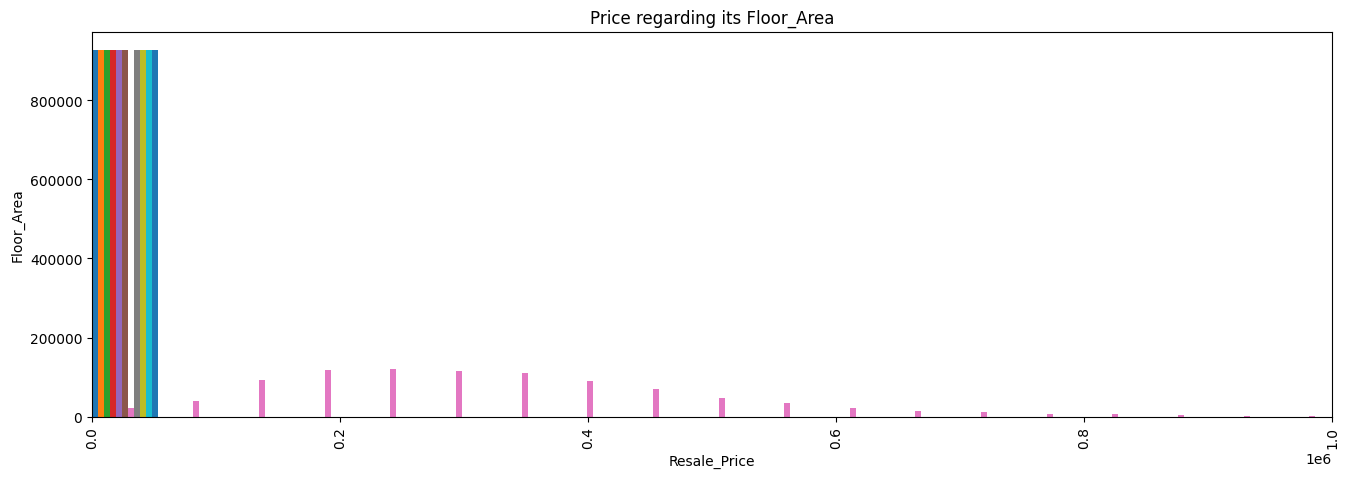

In [31]:
plt.figure(figsize =(16,5))
plt.hist(data1,bins=30,rwidth=1.0)
plt.title("Price regarding its Floor_Area"),
plt.xlabel('Resale_Price',font=dict(size=10)),
plt.ylabel('Floor_Area',font=dict(size=10)),   
plt.xticks(rotation=90)
plt.xlim(0,1000000)
plt.show()

<Figure size 1600x500 with 0 Axes>

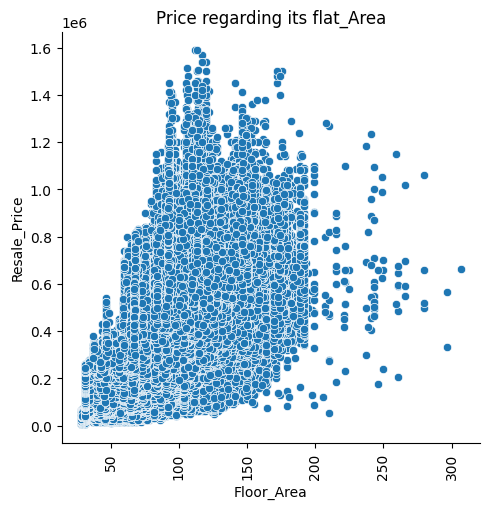

In [32]:
plt.figure(figsize =(16,5))
sns.relplot(data1,x='floor_area_sqm',y = 'resale_price',kind='scatter')
plt.title("Price regarding its flat_Area"),
plt.xlabel('Floor_Area',font=dict(size=10)),
plt.ylabel('Resale_Price',font=dict(size=10)),   
plt.xticks(rotation=90)
# plt.ylim(5000,1000000)
plt.show()

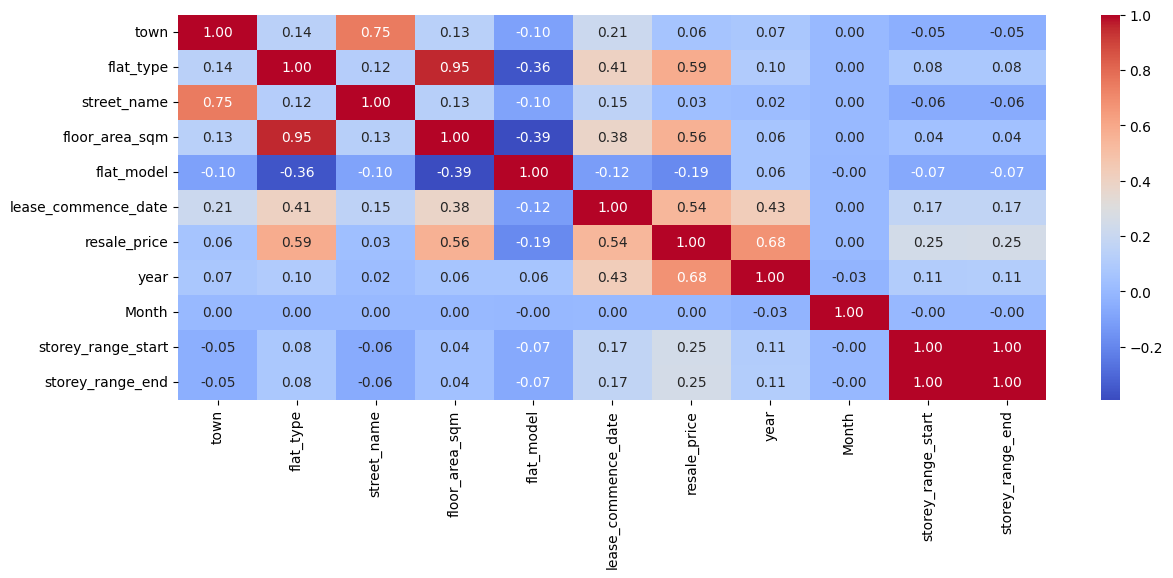

In [11]:
plt.figure(figsize =(14,5))
sns.heatmap(data1.corr(),fmt =".2f",cmap ="coolwarm",annot =True)
plt.show()

### Spliting and Feature Selection

In [3]:
# Feature selection
x = data1.drop("resale_price",axis = 1)
x

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,year,Month,storey_range_start,storey_range_end
0,0,0,13,31.0,7,1977,1990,1,10,12
1,0,0,13,31.0,7,1977,1990,1,4,6
2,0,0,13,31.0,7,1977,1990,1,10,12
3,0,0,13,31.0,7,1977,1990,1,7,9
4,0,2,13,73.0,20,1976,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...
927420,26,3,573,84.0,28,1987,2024,7,7,9
927421,26,4,554,132.0,9,1986,2024,7,7,9
927422,26,4,556,113.0,9,2018,2024,7,4,6
927423,26,4,556,112.0,9,2018,2024,7,1,3


In [4]:
y = data1["resale_price"]
y

0           9000.0
1           6000.0
2           8000.0
3           6000.0
4          47200.0
            ...   
927420    500000.0
927421    698000.0
927422    690000.0
927423    650000.0
927424    770000.0
Name: resale_price, Length: 927425, dtype: float64

In [22]:
y.shape

(927425,)

In [5]:
sc=StandardScaler()
scaled=sc.fit(x)
scaled

StandardScaler()

In [6]:
with open('scaled.pkl', 'wb') as file:
    pickle.dump(scaled, file)

with open('scaled.pkl', 'rb') as file:
    loaded_scaled = pickle.load(file)
loaded_scaled    

StandardScaler()

In [7]:
x_trans =scaled.transform(x)
x_trans


array([[-1.55259412, -3.17930046, -1.50329403, ..., -1.62761191,
         0.68699823,  0.68394579],
       [-1.55259412, -3.17930046, -1.50329403, ..., -1.62761191,
        -0.55641114, -0.55946505],
       [-1.55259412, -3.17930046, -1.50329403, ..., -1.62761191,
         0.68699823,  0.68394579],
       ...,
       [ 1.4037365 ,  1.03892792,  1.48698339, ...,  0.13199614,
        -0.55641114, -0.55946505],
       [ 1.4037365 ,  1.03892792,  1.48698339, ...,  0.13199614,
        -1.17811582, -1.18117046],
       [ 1.4037365 ,  2.09348502,  1.54755991, ...,  0.13199614,
        -1.17811582, -1.18117046]])

### Model Selection and Training

1. Model Selection --train_test_split
2. model training --best fit algorithm
3. grid Search CV --on selected algorithm --hyperparameter tunning
4. prediction -- best_score and params -- new data


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_trans,y,test_size= 0.3,random_state= 42)

In [9]:
x_train.shape

(649197, 10)

In [10]:
x_test.shape

(278228, 10)

Model Selection and Training: Choose an appropriate machine learning model for regression (e.g., linear regression, decision trees, or random forests)

Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) and R2 Score.


In [11]:

LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)  ## 0.7631740506980412

0.763160635003803

In [35]:
with open('LR.pkl', 'wb') as file:
    pickle.dump(LR, file)

with open('LR.pkl', 'rb') as file:
    loaded_LR = pickle.load(file)
loaded_LR    

LinearRegression()

### Hyperparameter tuning--grid searchCV

In [12]:
params_LR ={'fit_intercept':[True,False],
            'copy_X' :[True,False],
            'positive':[True,False]}
grid_search =GridSearchCV(LR,params_LR,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [13]:
best_p = grid_search.best_params_
best_s = grid_search.best_score_

print(best_p)
print(best_s)

{'copy_X': True, 'fit_intercept': True, 'positive': False}
0.764448115061531


In [14]:
LR1 = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
LR1.fit(x_train,y_train)
#LR.score(x_test,y_test)

LinearRegression()

In [15]:
with open('LR1.pkl', 'wb') as file:
    pickle.dump(LR1, file)

with open('LR1.pkl', 'rb') as file:
    loaded_LR1 = pickle.load(file)
loaded_LR1  

LinearRegression()

In [16]:
tr_pred =loaded_LR1.predict(x_train)
tr_pred

array([197189.09308714, 304122.90707154, 440635.24294651, ...,
       210192.07168276, 487522.95576767,  87859.09834029])

In [17]:
ts_pred = loaded_LR1.predict(x_test)
ts_pred

array([343328.6857255 , 171805.39085946, 405637.73475665, ...,
       268098.01895714, -90141.46980854, 640472.95579763])

In [18]:
print('R2_score :',r2_score(y_train,tr_pred))
print('Root_mean_squared_error :',root_mean_squared_error(y_train,tr_pred))
print('Mean_absolute_error :',mean_absolute_error(y_train,tr_pred))
print('Mean_squared_error :',mean_squared_error(y_train,tr_pred))

print("====================================")
print('R2_score :',r2_score(y_test,ts_pred))
print('Root_mean_squared_error :',root_mean_squared_error(y_test,ts_pred))
print('Mean_absolute_error :',mean_absolute_error(y_test,ts_pred))
print('Mean_squared_error :',mean_squared_error(y_test,ts_pred))

R2_score : 0.7644570505181589
Root_mean_squared_error : 83106.17957032111
Mean_absolute_error : 61200.854518580745
Mean_squared_error : 6906637082.774458
R2_score : 0.763160635003803
Root_mean_squared_error : 83106.8443572065
Mean_absolute_error : 61283.03954685494
Mean_squared_error : 6906747579.012947


In [39]:
t = loaded_label_encoder.transform(np.array(['HOUGANG']))
t

array([11])

In [40]:
f =loaded_Label_Encoder2.transform(np.array(['3 ROOM']))
f

array([2])

In [41]:
st =loaded_Label_Encoder3.transform(np.array(['BEDOK RESERVOIR RD']))
st

array([45])

In [42]:
fm =loaded_Label_Encoder4.transform(np.array(['IMPROVED-MAISONETTE']))
fm

array([8])

In [46]:
list =np.array([[11,2,45,90,8,2001,2018,1,4,10]])
res =loaded_scaled.transform(list)
res

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.30183885, -1.07018627, -1.32707142, -0.22131317, -1.15739671,
         1.1885042 ,  1.26061267, -1.62761191, -0.55641114,  0.26947551]])

In [47]:
price = loaded_LR1.predict(res)
price

array([544819.16439265])

In [20]:
price = loaded_LR1.predict([[8,2,98,90,5,2001,2018,1,4,10]])[0]
price

235713219.1982763

In [21]:
price =loaded_LR1.predict([[4,2,6,600,3,2000,2012,12,5,10]])[0]
print('$'+str(np.round(price,2)))

$258761179.36


### Random Forest

In [17]:
rfr =RandomForestRegressor()
rfr.fit(x_train,y_train)
#rfr.score(x_test,y_test)   ## 0.9820703729777054

RandomForestRegressor()

In [18]:
rfr.score(x_test,y_test)

0.9816495446399943

In [3]:
from joblib import dump, load

# Save model to file using joblib
#dump(rfr, 'rfrmodel.joblib')

# Load model from file
#loaded_rfr = load('rfrmodel.joblib')


In [4]:
# Load model from file
loaded_rf = load('rfrmodel.joblib', mmap_mode='r')
loaded_rf

RandomForestRegressor()

In [15]:
tr_pred = loaded_rf.predict(x_train)
tr_pred

array([181630.        , 224669.66666667, 398650.        , ...,
       311550.        , 591758.8       , 167136.        ])

In [16]:
ts_pred = loaded_rf.predict(x_test)
ts_pred

array([358554.5       , 292451.38      , 291929.66666667, ...,
       224166.66666667,  17218.90833333, 638451.28      ])

In [17]:
print('R2_score :',r2_score(y_train,tr_pred))
print('Root_mean_squared_error :',root_mean_squared_error(y_train,tr_pred))
print('Mean_absolute_error :',mean_absolute_error(y_train,tr_pred))
print('Mean_squared_error :',mean_squared_error(y_train,tr_pred))

print("====================================")
print('R2_score :',r2_score(y_test,ts_pred))
print('Root_mean_squared_error :',root_mean_squared_error(y_test,ts_pred))
print('Mean_absolute_error :',mean_absolute_error(y_test,ts_pred))
print('Mean_squared_error :',mean_squared_error(y_test,ts_pred))

R2_score : 0.9970358958418655
Root_mean_squared_error : 9322.770512635825
Mean_absolute_error : 6198.975700237138
Mean_squared_error : 86914050.03127205
R2_score : 0.9816495446399943
Root_mean_squared_error : 23133.069938680004
Mean_absolute_error : 15393.553686705634
Mean_squared_error : 535138924.7878606


In [18]:
data1.columns

Index(['town', 'street_name', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'year', 'Month',
       'storey_range_start', 'storey_range_end'],
      dtype='object')

In [20]:
price = loaded_rf.predict([[8,98,90,5,2001,2018,1,4,10]])[0]
price

1091074.9287999999

In [24]:
price =loaded_rf.predict([[4,6,600,3,2000,2012,12,5,10]])[0]
print('$'+str(np.round(price,2)))

$1096694.93


### HYPERPARAMETER TUNING

In [ ]:
# random search CV
params ={'n_estimators':[int(i) for i in np.linspace(start=200,stop= 1000,num=10)],
                                           'max_depth' :[int(i) for i  in np.linspace(10,100,10)],
                                           'max_features':['auto','sqrt','log2'],
                                           'min_samples_split':[1,3,4,5,7,9],
                                           'min_samples_leaf':[1,2,4,6,8],
                                           'criterion' : ['entropy','friedman_mse', 'absolute_error', 'squared_error', 'poisson']}
rand_search =RandomizedSearchCV(rfr,params,cv=6,verbose = 2,n_iter= 10,random_state =100,n_jobs =1)
rand_search.fit(x_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.6s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.1s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=911; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=60, max_features=log2, min_samples_leaf=1, min_samples_split=7

In [ ]:
best_p = rand_search.best_params_
best_s = rand_search.best_score_

print(best_p)
print(best_s)

NameError: name 'rand_search' is not defined

In [ ]:
# grid search Cv
params ={'n_estimators':[int(i) for i in np.linspace(start=200,stop= 1000,num=10)],
                                           'max_depth' :[int(i) for i  in np.linspace(10,100,10)],
                                           'max_features':['auto','sqrt','log2'],
                                           'criterion' : ['entropy','gini']}
grid_search =GridSearchCV(rfr,params,cv=5,verose = 2)
grid_search.fit(x_train,y_train)

NameError: name 'np' is not defined

### All algoritms function

In [ ]:
def find_model(x,y):
    algorithm ={'decision_tree':{'model': DecisionTreeRegressor(),
                                 'params':{'criterion' : ['squared_error','friedman_mse','absolute_error'],
                                           #'splitter' : ['best','random'],
                                           #'max_features':['auto','sqrt','log2']
                                           }},
                        'lasso':{'model': Lasso(),
                                          'params':{ 'alpha':[1,2],
                                          'selection':['random','cyclic']}},
                'randomforest': {'model': RandomForestRegressor(),
                                 'params':{'n_estimators':[int(i) for i in np.linspace(start=200,stop= 2000,num=10)],
                                           'max_depth' :[int(i) for i  in np.linspace(10,1000,10)],
                                           'max_features':['auto','sqrt','log2'],
                                          # 'min_samples_split':[1,3,4,5,7,9],
                                          # 'min_samples_leaf':[1,2,4,6,8],
                                           'criterion' : ['entropy','gini']}},
                'Gradient boosting':{'model':GradientBoostingRegressor(),
                                     'params':{'learning_rate':[.1,0.1,.05,.001],
                                               #'loss':['squared_error','huber','absolute_error','quantile'],
                                               'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                                               'n_estimators':[8,16,32,64,128,256]}},
                'kNearestNeighbour':{'model': KNeighborsRegressor(),
                                     'params': {'n_neighbour':[5,7,9,11],
                                                #'weights': ['uniform','distance'],
                                                #'algorithm':['ball_tree','kd_tree','brute']
                                                }},
                'xgbRegressor':{'model':XGBRegressor(),
                                'params':{'learning_rate':[.1,.01,.05,.001],
                                          'n_estimators':[8,16,32,64,128,256]}},                  
                'AdaBoost regressor':{'model':AdaBoostRegressor(),
                                      'params':{'learning_rate':[.1,.01,0.5,.001],
                                                #'loss':['linear','square','exponential'],
                                                'n_estimators':[8,16,32,64,128,256]}},                        
                'catboostingRegressor':{'model':CatBoostRegressor(),
                                        'params':{'depth':[6,8,10],
                                                  'learning_rate':[0.01,0.05,0.1],
                                                  'iterations':[30,50,100]}}
    }

    score = []
    cv =ShuffleSplit(n_splits =5,test_size = 0.3,random_state =0)
    for algor_name,config in algorithm.items():
        gs =GridSearchCV(config['model'],config['params'],cv =cv,return_train_score =False)
        gs.fit(x,y)
        score.append({'model': algorithm,
                   'best_score': gs.best_score_,
                   'best_params': gs.best_params_})
    
    return pd.Dataframe(score,columns= ['Models','Best_score','Best_params'])  
#find_model(x_trans,y) 

seperately runed algorithms with Scores

In [ ]:

LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)  ## 0.7631740506980412

DR = DecisionTreeRegressor()
DR.fit(x_train,y_train)
DR.score(x_test,y_test)    ## 0.9677140191551202

las =Lasso()
las.fit(x_train,y_train)
las.score(x_test,y_test)    ## 0.763070310139342

gbr =GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_test,y_test)   ## 0.9122011433643257 

knn =KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)  ## 0.9186605167684633

xg =XGBRegressor()
xg.fit(x_train,y_train)
xg.score(x_test,y_test)   ## 0.9778249994342268

cat = CatBoostRegressor(verbose=False)
cat.fit(x_train,y_train)
cat.score(x_test,y_test)  ## 0.9808829778258297

ada =AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_test,y_test)    ## 0.5625499297193807 